# Regression Analysis
Where we go through how we slowly but steadly improved upon the learning of the first model without regularization, then do the same for the regularized models.

## Strugeling to learn 

In [1]:
import matplotlib.pyplot as plt
from Functions import NeuralNetwork, mse, der_mse, sigmoid, der_sigmoid, linear, der_linear, dataset, softmax, cross_entropy, der_softmax, ReLU, der_ReLU, LeakyReLu, der_LeakyReLu, run_training_experiment, Heatmap_with_labels
import numpy as np
import copy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

seed = 42
np.random.seed(seed)

n_samples = 18
x, y_true, y_noise = dataset(n_samples,seed =seed)
scaler = StandardScaler()
X = scaler.fit_transform(x.reshape(-1, 1)) # Feature matrix (n_samples
y = y_true - np.mean(y_true)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

Nodes: 10, Depth: 1, Time: 0.11 seconds
Nodes: 10, Depth: 2, Time: 0.14 seconds
Nodes: 10, Depth: 3, Time: 0.19 seconds
Nodes: 10, Depth: 4, Time: 0.23 seconds
Nodes: 20, Depth: 1, Time: 0.10 seconds
Nodes: 20, Depth: 2, Time: 0.20 seconds
Nodes: 20, Depth: 3, Time: 0.24 seconds
Nodes: 20, Depth: 4, Time: 0.28 seconds
Nodes: 50, Depth: 1, Time: 0.11 seconds
Nodes: 50, Depth: 2, Time: 0.19 seconds
Nodes: 50, Depth: 3, Time: 0.27 seconds
Nodes: 50, Depth: 4, Time: 0.35 seconds
Nodes: 100, Depth: 1, Time: 0.13 seconds
Nodes: 100, Depth: 2, Time: 0.27 seconds
Nodes: 100, Depth: 3, Time: 0.40 seconds
Nodes: 100, Depth: 4, Time: 0.54 seconds


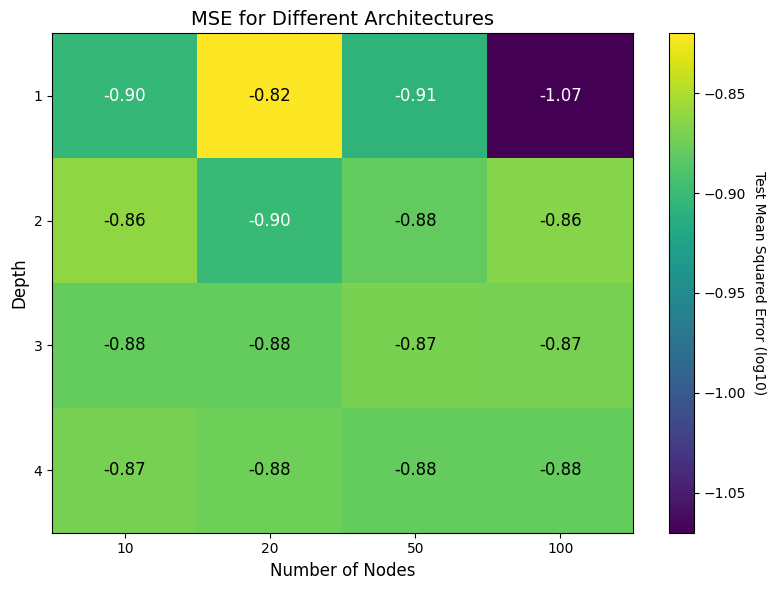

In [2]:
epochs=1000
batch_size=5
learning_rate=0.1
activations=[sigmoid, sigmoid, linear]
activation_ders=[der_sigmoid, der_sigmoid, der_linear] 
layer_sizes=[50,50,1]
method="GD"
cost_func=mse
cost_der_func=der_mse
regularization_type=None
lambda_reg=0.01

# Testing Lists
Nodes = [10, 20, 50, 100]
Depths = [1, 2, 3, 4]

mse_matrix = np.zeros((len(Nodes), len(Depths)))

for i, node in enumerate(Nodes):
    for j, depth in enumerate(Depths):
        start_time = time.perf_counter()
        mse_matrix[i, j],_,_ = run_training_experiment(X_train, y_train, X_test, y_test,
                             n_epochs=epochs, method=method, batch_size=batch_size, learning_rate=learning_rate,
                             activation_funcs=[sigmoid]*depth + [linear], 
                             activation_ders=[der_sigmoid]*depth + [der_linear], 
                             layer_sizes=[node]*depth + [1],
                             cost_func=cost_func,
                             cost_der_func=cost_der_func, 
                             Regularization_type=regularization_type, 
                             lambda_reg=lambda_reg)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        print(f"Nodes: {node}, Depth: {depth}, Time: {elapsed_time:.2f} seconds")

plot_mse = np.log10(mse_matrix)
Heatmap_with_labels(plot_mse.T, Nodes, Depths, "MSE for Different Architectures",  "Number of Nodes","Depth")

As we see above it is struggeling to learn at the more complex architectures for the FFNN network.
IF we look at a specific training run we see that it is because it takes a long time for it to learn.

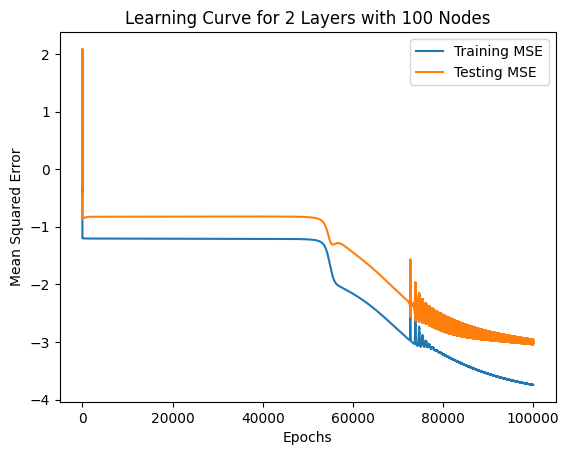

In [3]:
layer_nodes = 100
layer = 2

nn = NeuralNetwork(
    network_input_size=X_train.shape[1],
    layer_output_sizes=[layer_nodes] * layer + [1],
    activation_funcs=[sigmoid] * layer + [linear],
    activation_ders=[der_sigmoid] * layer + [der_linear],
    cost_fun=cost_func,
    cost_der=cost_der_func,
    seed=42
)
training_scores = []
testing_scores = []

learning_rate = 0.1
epochs = 100000


for i in range(epochs):
    grads = nn.compute_gradient(X_train, y_train)
    grads = [(dW * learning_rate, db * learning_rate) for dW, db in grads]
    training_scores.append(nn.cost(X_train, y_train))
    testing_scores.append(nn.cost(X_test, y_test))
    nn.update_weights(grads)

training_scores = np.log10(training_scores)
testing_scores = np.log10(testing_scores)
plt.plot(training_scores, label='Training MSE')
plt.plot(testing_scores, label='Testing MSE')
plt.title(f'Learning Curve for 2 Layers with {layer_nodes} Nodes')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

As we see the learning rate had to be quite high 0.1 and we still had to wait a long time for the vanishing gradients to build up until they where able to train the network in any manner.
One reason for this is of course the low training set,but we will see that a better optimizer will help a lot. 

## Solving it with better optimizers

Method: GD, Learning Rate: 1e-05, Time: 0.20 seconds
Method: GD, Learning Rate: 0.0001, Time: 0.19 seconds
Method: GD, Learning Rate: 0.001, Time: 0.19 seconds
Method: GD, Learning Rate: 0.01, Time: 0.19 seconds
Method: GD, Learning Rate: 0.1, Time: 0.19 seconds


c:\Users\Anton\Documents\UiO Fag\FYS-STK4155 Anvendt dataanalyse og maskinlæring\Eget Arbeid\.venv\Lib\site-packages\autograd\tracer.py:54: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


Method: GD, Learning Rate: 1.0, Time: 0.21 seconds
Method: SGD, Learning Rate: 1e-05, Time: 0.39 seconds
Method: SGD, Learning Rate: 0.0001, Time: 0.39 seconds
Method: SGD, Learning Rate: 0.001, Time: 0.39 seconds
Method: SGD, Learning Rate: 0.01, Time: 0.39 seconds
Method: SGD, Learning Rate: 0.1, Time: 0.38 seconds
Method: SGD, Learning Rate: 1.0, Time: 0.42 seconds
Method: Adam, Learning Rate: 1e-05, Time: 0.61 seconds
Method: Adam, Learning Rate: 0.0001, Time: 0.61 seconds
Method: Adam, Learning Rate: 0.001, Time: 0.61 seconds
Method: Adam, Learning Rate: 0.01, Time: 0.61 seconds
Method: Adam, Learning Rate: 0.1, Time: 0.61 seconds
Method: Adam, Learning Rate: 1.0, Time: 0.61 seconds
Method: RMSprop, Learning Rate: 1e-05, Time: 0.51 seconds
Method: RMSprop, Learning Rate: 0.0001, Time: 0.51 seconds
Method: RMSprop, Learning Rate: 0.001, Time: 0.51 seconds
Method: RMSprop, Learning Rate: 0.01, Time: 0.51 seconds
Method: RMSprop, Learning Rate: 0.1, Time: 0.51 seconds
Method: RMSprop

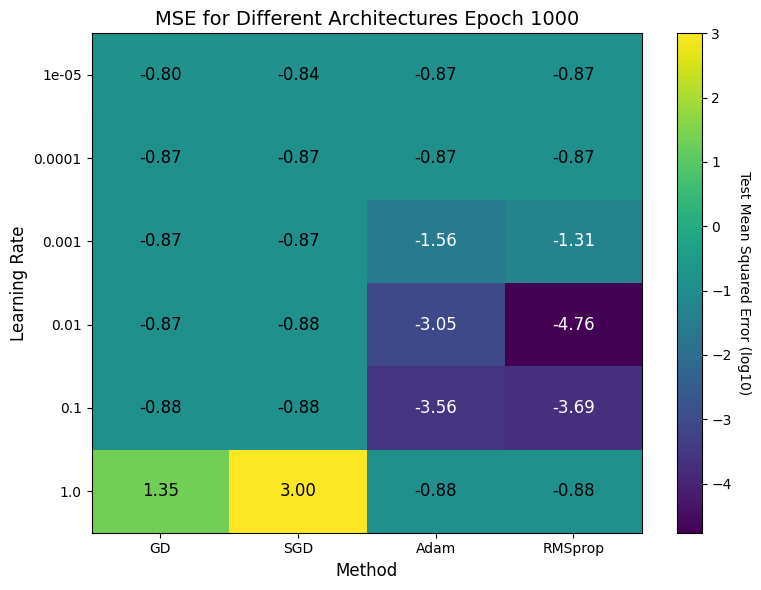

In [ ]:
epochs=1000
batch_size=5
learning_rate=0.1
activations=[sigmoid, sigmoid, linear]
activation_ders=[der_sigmoid, der_sigmoid, der_linear] 
layer_sizes=[50,50,1]
method="GD"
cost_func=mse
cost_der_func=der_mse
regularization_type=None
lambda_reg=0.01

# Testing Lists
Methods = ["GD", "SGD", "Adam", "RMSprop"]
learning_rates = np.logspace(-5, 0, 6)

mse_matrix = np.zeros((len(Methods), len(learning_rates)))

for i, method in enumerate(Methods):
    for j, lr in enumerate(learning_rates):
        start_time = time.perf_counter()
        mse_matrix[i, j],_,_ = run_training_experiment(X_train, y_train, X_test, y_test,
                             n_epochs=epochs, method=method, batch_size=batch_size, learning_rate=lr,
                             activation_funcs=activations, 
                             activation_ders=activation_ders, 
                             layer_sizes=layer_sizes,
                             cost_func=cost_func,
                             cost_der_func=cost_der_func, 
                             Regularization_type=regularization_type, 
                             lambda_reg=lambda_reg)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        print(f"Method: {method}, Learning Rate: {lr}, Time: {elapsed_time:.2f} seconds")

plot_mse = np.log10(mse_matrix)
Heatmap_with_labels(plot_mse.T, Methods, learning_rates, "MSE for Different Architectures Epoch 1000",  "Method","Learning Rate")

As we see Rmsprop is able to learn something in the first 1000 epoch in comparison to what we found for the GD on this Architecture where it first began to improve after 50'000 iterations of the full training set.
A factor that has something to say is that we are training on subbatches and are in effect updating thrice as often for the SGD, ADAM and RMSprop methods.
But since the SGD is equal with GD, this has nothing to say and our added use of momentum has a remarkable improvement though it comes at a cost of increased floating point operations and training time. Still well use of resources as the previous was just horrendous. 

## Focusing on RMSprop
As we know that ADAM is one of the best methods we know about we will optimize our hyperparameters with regards to this one.

Nodes: 10, Depth: 1, Time: 3.26 seconds
Nodes: 10, Depth: 2, Time: 4.93 seconds
Nodes: 10, Depth: 3, Time: 6.52 seconds
Nodes: 10, Depth: 4, Time: 8.09 seconds
Nodes: 20, Depth: 1, Time: 3.29 seconds
Nodes: 20, Depth: 2, Time: 5.13 seconds
Nodes: 20, Depth: 3, Time: 6.85 seconds
Nodes: 20, Depth: 4, Time: 8.50 seconds
Nodes: 50, Depth: 1, Time: 3.47 seconds
Nodes: 50, Depth: 2, Time: 6.06 seconds
Nodes: 50, Depth: 3, Time: 8.55 seconds
Nodes: 50, Depth: 4, Time: 10.83 seconds
Nodes: 100, Depth: 1, Time: 3.75 seconds
Nodes: 100, Depth: 2, Time: 7.95 seconds
Nodes: 100, Depth: 3, Time: 12.06 seconds
Nodes: 100, Depth: 4, Time: 16.14 seconds


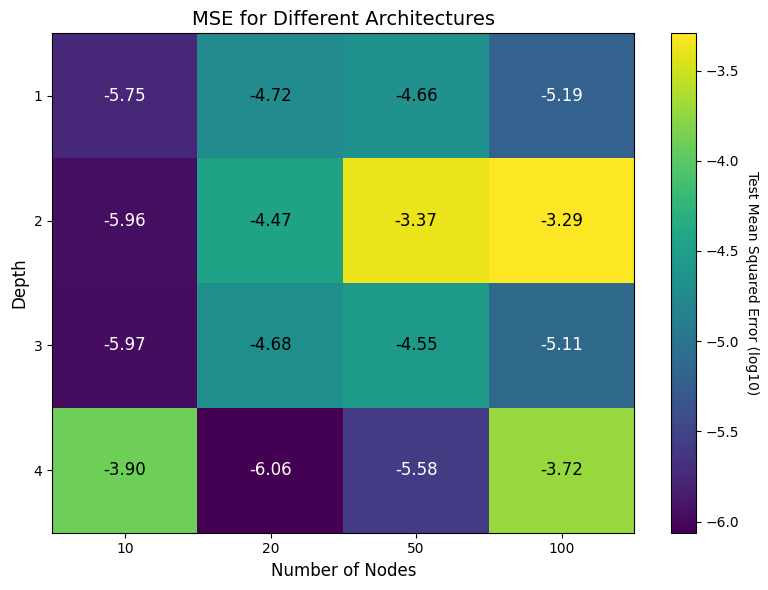

In [29]:
epochs=10000
batch_size=5
learning_rate=0.01
activations=[sigmoid, sigmoid, linear]
activation_ders=[der_sigmoid, der_sigmoid, der_linear] 
layer_sizes=[50,50,1]
method="Adam"
cost_func=mse
cost_der_func=der_mse
regularization_type=None
lambda_reg=0.01

# Testing Lists
Nodes = [10, 20, 50, 100]
Depths = [1, 2, 3, 4]

mse_matrix = np.zeros((len(Nodes), len(Depths)))

for i, node in enumerate(Nodes):
    for j, depth in enumerate(Depths):
        start_time = time.perf_counter()
        mse_matrix[i, j],_,_ = run_training_experiment(X_train, y_train, X_test, y_test,
                             n_epochs=epochs, method=method, batch_size=batch_size, learning_rate=learning_rate,
                             activation_funcs=[sigmoid]*depth + [linear], 
                             activation_ders=[der_sigmoid]*depth + [der_linear], 
                             layer_sizes=[node]*depth + [1],
                             cost_func=cost_func,
                             cost_der_func=cost_der_func, 
                             Regularization_type=regularization_type, 
                             lambda_reg=lambda_reg)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        print(f"Nodes: {node}, Depth: {depth}, Time: {elapsed_time:.2f} seconds")

plot_mse = np.log10(mse_matrix)
Heatmap_with_labels(plot_mse.T, Nodes, Depths, "MSE for Different Architectures",  "Number of Nodes","Depth")

Here we see that when we are able to train efficently we are getting what we would expect from the increased complexity of the architecture of the model.
Though with the RMSprop we still got the best result for the 10 hidden layer architecture when we trained for a small amount of time. And Adam gave 20x4 as the best architecure though it was really close with 1-2-3 at 10, (6.06 to 5.97,5.96,5.75).
This examplifises the intrecasies with doing a hyperparameter tuning, everything is related to each other and if one change one parameter the earlier parameters will also be affected, perhaps the learning rate needs to be higher or lower with this new architecture to actually get the best performance.


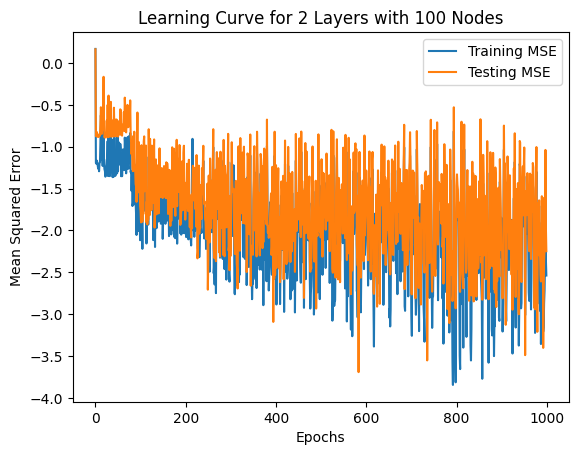

In [16]:
epochs=1000
batch_size=5
learning_rate=0.1
activations=[sigmoid, sigmoid,linear]
activation_ders=[der_sigmoid, der_sigmoid, der_linear] 
layer_sizes=[50,50,1]
method="RMSprop"
cost_func=mse
cost_der_func=der_mse
regularization_type=None
lambda_reg=0.01




best_score, training_scores, testing_scores = run_training_experiment(X_train, y_train, X_test, y_test,
                             n_epochs=epochs, method=method, batch_size=batch_size, learning_rate=learning_rate,
                             activation_funcs=activations, 
                             activation_ders=activation_ders, 
                             layer_sizes=layer_sizes,
                             cost_func=cost_func,
                             cost_der_func=cost_der_func, 
                             Regularization_type=regularization_type, 
                             lambda_reg=lambda_reg)


training_scores = np.log10(training_scores)
testing_scores = np.log10(testing_scores)
plt.plot(training_scores, label='Training MSE')
plt.plot(testing_scores, label='Testing MSE')
plt.title(f'Learning Curve for 2 Layers with {layer_nodes} Nodes')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

That is a really unregular training run, perhaps we would have use for more regularization to make the gradients and weights behave more cleanly.

Regularization: None, Lambda: 1e-05, Time: 5.21 seconds
Regularization: None, Lambda: 0.0001, Time: 5.21 seconds
Regularization: None, Lambda: 0.001, Time: 5.35 seconds
Regularization: None, Lambda: 0.01, Time: 5.22 seconds
Regularization: None, Lambda: 0.1, Time: 5.23 seconds
Regularization: None, Lambda: 1.0, Time: 5.30 seconds
Regularization: L1, Lambda: 1e-05, Time: 6.04 seconds
Regularization: L1, Lambda: 0.0001, Time: 5.97 seconds
Regularization: L1, Lambda: 0.001, Time: 6.01 seconds
Regularization: L1, Lambda: 0.01, Time: 6.29 seconds
Regularization: L1, Lambda: 0.1, Time: 6.25 seconds
Regularization: L1, Lambda: 1.0, Time: 6.16 seconds
Regularization: L2, Lambda: 1e-05, Time: 5.79 seconds
Regularization: L2, Lambda: 0.0001, Time: 5.83 seconds
Regularization: L2, Lambda: 0.001, Time: 5.66 seconds
Regularization: L2, Lambda: 0.01, Time: 5.70 seconds
Regularization: L2, Lambda: 0.1, Time: 5.65 seconds
Regularization: L2, Lambda: 1.0, Time: 5.75 seconds


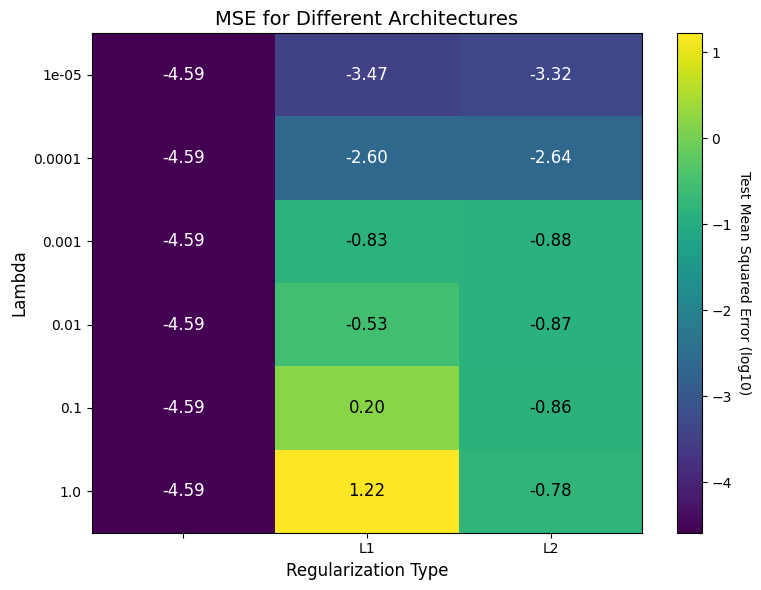

In [22]:
epochs=10000
batch_size=5
learning_rate=0.1
activations=[sigmoid, sigmoid,linear]
activation_ders=[der_sigmoid, der_sigmoid, der_linear] 
layer_sizes=[50,50,1]
method="RMSprop"
cost_func=mse
cost_der_func=der_mse
regularization_type=None
lambda_reg=0.01


# Testing Lists
regularization_type = [None, "L1", "L2"]
lambda_reg = np.logspace(-5, 0, 6)

mse_matrix = np.zeros((len(regularization_type), len(lambda_reg)))

for i, reg in enumerate(regularization_type):
    for j, lam in enumerate(lambda_reg):
        start_time = time.perf_counter()
        mse_matrix[i, j],_,_ = run_training_experiment(X_train, y_train, X_test, y_test,
                             n_epochs=epochs, method=method, batch_size=batch_size, learning_rate=learning_rate,
                             activation_funcs=activations, 
                             activation_ders=activation_ders, 
                             layer_sizes=layer_sizes,
                             cost_func=cost_func,
                             cost_der_func=cost_der_func, 
                             Regularization_type=reg, 
                             lambda_reg=lam)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        print(f"Regularization: {reg}, Lambda: {lam}, Time: {elapsed_time:.2f} seconds")

plot_mse = np.log10(mse_matrix)
Heatmap_with_labels(plot_mse.T, regularization_type, lambda_reg, "MSE for Different Architectures",  "Regularization Type","Lambda")

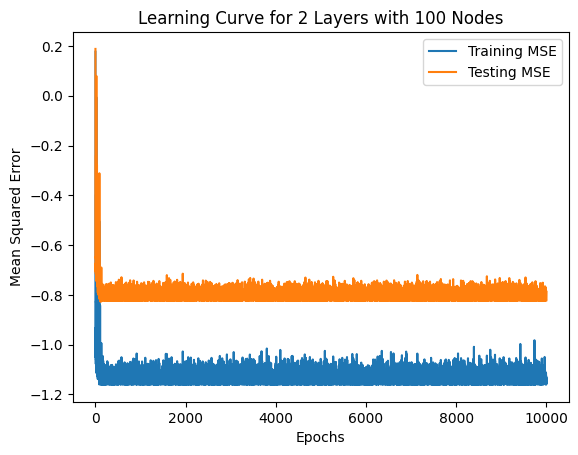

In [24]:
epochs=10000
batch_size=5
learning_rate=0.01
activations=[sigmoid, sigmoid, linear]
activation_ders=[der_sigmoid, der_sigmoid, der_linear] 
layer_sizes=[50,50,1]
method="RMSprop"
cost_func=mse
cost_der_func=der_mse
regularization_type="L1"
lambda_reg=1e-03




best_score, training_scores, testing_scores = run_training_experiment(X_train, y_train, X_test, y_test,
                             n_epochs=epochs, method=method, batch_size=batch_size, learning_rate=learning_rate,
                             activation_funcs=activations, 
                             activation_ders=activation_ders, 
                             layer_sizes=layer_sizes,
                             cost_func=cost_func,
                             cost_der_func=cost_der_func, 
                             Regularization_type=regularization_type, 
                             lambda_reg=lambda_reg)


training_scores = np.log10(training_scores)
testing_scores = np.log10(testing_scores)
plt.plot(training_scores, label='Training MSE')
plt.plot(testing_scores, label='Testing MSE')
plt.title(f'Learning Curve for 2 Layers with {layer_nodes} Nodes')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

Doesnt seem to help much when it comes to this non noisy data.
Perhaps we will se some development when it comes to the noisy data. At least it seems to be more regular.

### Looking at different Activation functions

Activation: Sigmoid, Learning Rate: 1e-05, Time: 1.13 seconds
Activation: Sigmoid, Learning Rate: 0.0001, Time: 1.12 seconds
Activation: Sigmoid, Learning Rate: 0.001, Time: 1.12 seconds
Activation: Sigmoid, Learning Rate: 0.01, Time: 1.14 seconds
Activation: Sigmoid, Learning Rate: 0.1, Time: 1.14 seconds
Activation: Sigmoid, Learning Rate: 1.0, Time: 1.14 seconds
Activation: ReLU, Learning Rate: 1e-05, Time: 1.14 seconds
Activation: ReLU, Learning Rate: 0.0001, Time: 1.08 seconds
Activation: ReLU, Learning Rate: 0.001, Time: 1.05 seconds
Activation: ReLU, Learning Rate: 0.01, Time: 1.04 seconds
Activation: ReLU, Learning Rate: 0.1, Time: 1.06 seconds
Activation: ReLU, Learning Rate: 1.0, Time: 1.04 seconds
Activation: LeakyReLU, Learning Rate: 1e-05, Time: 1.02 seconds
Activation: LeakyReLU, Learning Rate: 0.0001, Time: 1.04 seconds
Activation: LeakyReLU, Learning Rate: 0.001, Time: 1.05 seconds
Activation: LeakyReLU, Learning Rate: 0.01, Time: 1.05 seconds
Activation: LeakyReLU, Lea

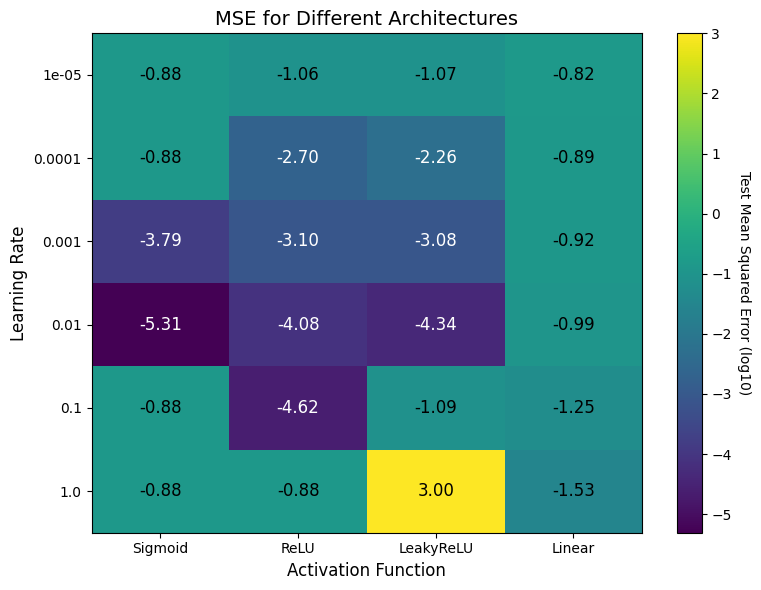

In [9]:
epochs=1000
batch_size=5
learning_rate=0.1
activations=[sigmoid, sigmoid, linear]
activation_ders=[der_sigmoid, der_sigmoid,der_linear] 
layer_sizes=[50,50,1]
method="RMSprop"
cost_func=mse
cost_der_func=der_mse
regularization_type=None
lambda_reg=1e-03

# Testing Lists
activation_names = ['Sigmoid', 'ReLU', 'LeakyReLU', 'Linear']
activation = [(sigmoid, der_sigmoid), (ReLU, der_ReLU), (LeakyReLu, der_LeakyReLu),(linear, der_linear)]
learning_rates = np.logspace(-5, 0, 6)

mse_matrix = np.zeros((len(activation), len(learning_rates)))

for i, (act, der) in enumerate(activation):
    for j, lr in enumerate(learning_rates):
        start_time = time.perf_counter()
        mse_matrix[i, j],_,_ = run_training_experiment(X_train, y_train, X_test, y_test,
                             n_epochs=epochs, method=method, batch_size=batch_size, learning_rate=lr,
                             activation_funcs=[act]*4 + [linear], 
                             activation_ders=[der]*4 + [der_linear], 
                             layer_sizes=[50]*4 + [1],
                             cost_func=cost_func,
                             cost_der_func=cost_der_func, 
                             Regularization_type=regularization_type, 
                             lambda_reg=lambda_reg)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        print(f"Activation: {activation_names[i]}, Learning Rate: {lr}, Time: {elapsed_time:.2f} seconds")

plot_mse = np.log10(mse_matrix)
Heatmap_with_labels(plot_mse.T, activation_names, learning_rates, "MSE for Different Architectures",  "Activation Function","Learning Rate")

For activation functiosn we see that even though some parameter was optimal for one architecture it wont be the same for an other architecture i.e. ReLu performs better on this architecture with a higher learning rate.

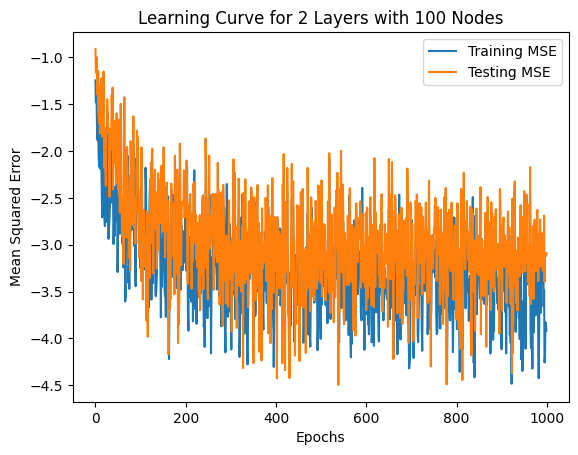

In [30]:
epochs=1000
batch_size=5
learning_rate=0.01
activations= [ReLU]*2 + [linear]
activation_ders=[der_ReLU]*2 + [der_linear]
layer_sizes=[50]*2 + [1]
method="RMSprop"
cost_func=mse
cost_der_func=der_mse
regularization_type=None
lambda_reg=1e-03




best_score, training_scores, testing_scores = run_training_experiment(X_train, y_train, X_test, y_test,
                             n_epochs=epochs, method=method, batch_size=batch_size, learning_rate=learning_rate,
                             activation_funcs=activations, 
                             activation_ders=activation_ders, 
                             layer_sizes=layer_sizes,
                             cost_func=cost_func,
                             cost_der_func=cost_der_func, 
                             Regularization_type=regularization_type, 
                             lambda_reg=lambda_reg)


training_scores = np.log10(training_scores)
testing_scores = np.log10(testing_scores)
plt.plot(training_scores, label='Training MSE')
plt.plot(testing_scores, label='Testing MSE')
plt.title(f'Learning Curve for 2 Layers with {layer_nodes} Nodes')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [32]:
def hey():
    return 1, 2, 3

ok,_,_ = hey()

print(ok)

1
